In [1]:
import pandas as pd
import numpy as np
import os 
from sklearn.cluster import KMeans

In [2]:
os.chdir('..')

In [3]:
from database.database_connection import DatabaseConnection
from database.database import DatabaseProcessor

In [4]:
database_connection = DatabaseConnection()
database_processor = DatabaseProcessor()


In [5]:
connection = database_connection.connect()

Successfully connected to the database.


In [6]:
query = 'SELECT * FROM xdr_data'

df = database_connection.execute_query(query= query)

In [7]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.304243e+19,4/24/2019 4:04,538.0,4/25/2019 4:04,564.0,86400.0,2.082019e+14,3.365976e+10,8.637690e+13,T86662C,...,20176790.0,7248835.0,19496552.0,19034426.0,842697621.0,3968584.0,87870953.0,5838574.0,37054908.0,893366791.0
1,1.304243e+19,4/24/2019 4:05,469.0,4/25/2019 4:05,488.0,86400.0,2.082014e+14,3.366494e+10,8.637690e+13,L85707A,...,8681610.0,20396543.0,17156656.0,21471320.0,356371884.0,14928486.0,770046282.0,5960843.0,65043142.0,386304165.0
2,1.304243e+19,4/24/2019 4:05,757.0,4/25/2019 4:05,798.0,86400.0,2.082017e+14,3.365025e+10,8.637690e+13,T88971A,...,11817925.0,16553354.0,4853359.0,6858075.0,372584526.0,6923073.0,770970405.0,10022383.0,43737721.0,396995384.0
3,7.277826e+18,4/24/2019 4:05,173.0,4/25/2019 0:49,672.0,74650.0,2.082095e+14,3.366576e+10,3.534681e+13,D87831A,...,2057129.0,2957404.0,13853948.0,16432581.0,434602995.0,14182078.0,73443155.0,13986735.0,50513414.0,463677578.0
4,1.304243e+19,4/24/2019 4:05,423.0,4/25/2019 4:05,464.0,86400.0,2.082017e+14,3.363529e+10,3.554001e+13,L40281C,...,20841068.0,10980409.0,15434400.0,6783821.0,300103370.0,14506616.0,618030971.0,6867813.0,41561530.0,346187516.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/24/2019 4:04,598.0,4/25/2019 4:04,605.0,86400.0,2.082018e+14,3.365871e+10,8.637690e+13,L77140B,...,13999949.0,509869.0,5695833.0,14965078.0,749743270.0,2327066.0,823882019.0,633068.0,21989064.0,778476685.0
149997,1.304243e+19,4/24/2019 4:04,474.0,4/25/2019 4:04,485.0,86400.0,2.082018e+14,3.369933e+10,8.637690e+13,T74426A,...,22902143.0,2667186.0,18299392.0,14942869.0,422942701.0,15618436.0,42254120.0,6359062.0,43120463.0,481719644.0
149998,1.304243e+19,4/24/2019 4:04,620.0,4/25/2019 4:04,554.0,86399.0,2.082014e+14,3.365880e+10,8.654080e+13,T73336B,...,13609890.0,1519389.0,8364844.0,8180320.0,218183377.0,11690021.0,781589063.0,13120138.0,38643684.0,245071475.0
149999,1.304243e+19,4/24/2019 4:04,306.0,4/25/2019 4:04,289.0,86399.0,2.082014e+14,3.365882e+10,8.637690e+13,T88747B,...,2253929.0,1559883.0,16681523.0,14136765.0,103978699.0,14106542.0,135550152.0,9128163.0,39849714.0,131557614.0


In [8]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [9]:
#check the datatypes of the columns and see if they are correct
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [10]:
#check for duplicated values
duplicated =df.duplicated()
print(duplicated.sum())                 

0


In [11]:
# exclude columns that are not necessary to analyse use engagment from the whole dataset
columns_to_exclude = [
    'Bearer Id', 'IMSI', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
    'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
    '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
    '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
    'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL',
    'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B',
    'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B',
    'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B',
    'Nb of sec with Vol UL < 1250B'
]

df = df.drop(columns=columns_to_exclude)


In [12]:
df.head()

,Start,Start ms,End,End ms,Dur. (ms),MSISDN/Number,HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,4/24/2019 4:04,538.0,4/25/2019 4:04,564.0,86400.0,3.365976e+10,168376187.0,3167876.0,4939945.0,5445123.0,...,20176790.0,7248835.0,19496552.0,19034426.0,842697621.0,3968584.0,87870953.0,5838574.0,37054908.0,893366791.0
1,4/24/2019 4:05,469.0,4/25/2019 4:05,488.0,86400.0,3.366494e+10,5192346.0,238359.0,427423.0,301813.0,...,8681610.0,20396543.0,17156656.0,21471320.0,356371884.0,14928486.0,770046282.0,5960843.0,65043142.0,386304165.0
2,4/24/2019 4:05,757.0,4/25/2019 4:05,798.0,86400.0,3.365025e+10,676170741.0,12060294.0,5575335.0,911081.0,...,11817925.0,16553354.0,4853359.0,6858075.0,372584526.0,6923073.0,770970405.0,10022383.0,43737721.0,396995384.0
3,4/24/2019 4:05,173.0,4/25/2019 0:49,672.0,74650.0,3.366576e+10,444840.0,91271.0,129716.0,119787.0,...,2057129.0,2957404.0,13853948.0,16432581.0,434602995.0,14182078.0,73443155.0,13986735.0,50513414.0,463677578.0
4,4/24/2019 4:05,423.0,4/25/2019 4:05,464.0,86400.0,3.363529e+10,58534598.0,1673799.0,3447674.0,3526940.0,...,20841068.0,10980409.0,15434400.0,6783821.0,300103370.0,14506616.0,618030971.0,6867813.0,41561530.0,346187516.0


In [13]:
missing_values = df.isnull().sum()

missing_values

Start                            1
Start ms                         1
End                              1
End ms                           1
Dur. (ms)                        1
MSISDN/Number                 1066
HTTP DL (Bytes)              81474
HTTP UL (Bytes)              81810
Activity Duration DL (ms)        1
Activity Duration UL (ms)        1
Social Media DL (Bytes)          0
Social Media UL (Bytes)          0
Google DL (Bytes)                0
Google UL (Bytes)                0
Email DL (Bytes)                 0
Email UL (Bytes)                 0
Youtube DL (Bytes)               0
Youtube UL (Bytes)               0
Netflix DL (Bytes)               0
Netflix UL (Bytes)               0
Gaming DL (Bytes)                0
Gaming UL (Bytes)                0
Other DL (Bytes)                 0
Other UL (Bytes)                 0
Total UL (Bytes)                 1
Total DL (Bytes)                 1
dtype: int64

In [14]:
#fill missing values with mean vaue of the column 

Columns_to_exclude = ['Bearer Id','Start','End']
for column in df.columns:
    if column not in Columns_to_exclude:
        df[column]=df[column].fillna(df[column].mean())




In [15]:
#check for missing values again 
df.isnull().sum()

Start                        1
Start ms                     0
End                          1
End ms                       0
Dur. (ms)                    0
MSISDN/Number                0
HTTP DL (Bytes)              0
HTTP UL (Bytes)              0
Activity Duration DL (ms)    0
Activity Duration UL (ms)    0
Social Media DL (Bytes)      0
Social Media UL (Bytes)      0
Google DL (Bytes)            0
Google UL (Bytes)            0
Email DL (Bytes)             0
Email UL (Bytes)             0
Youtube DL (Bytes)           0
Youtube UL (Bytes)           0
Netflix DL (Bytes)           0
Netflix UL (Bytes)           0
Gaming DL (Bytes)            0
Gaming UL (Bytes)            0
Other DL (Bytes)             0
Other UL (Bytes)             0
Total UL (Bytes)             0
Total DL (Bytes)             0
dtype: int64

In [16]:
#transform the date columns to datetime
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

#calculate session durarion from the start and end columns
df['Session duration (s)'] = (df['End'] - df['Start']).dt.total_seconds() * 100
#calculate total data transferred for each session
df['Total Data (DL+UL) (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
# aggregate each session per user and calculate the session fequency, session duration, total data transferred 

user_engagment_metric = df.groupby('MSISDN/Number').agg({
    'Session duration (s)': 'sum', # total session duration
    'Total Data (DL+UL) (Bytes)': 'sum', # total session data
    'Total Data (DL+UL) (Bytes)': 'mean', # avarage session data
    'Start': 'count' #session frequency
})

user_engagment_metric = user_engagment_metric.rename(columns={
    'Session duration (s)': 'Total Session Duration (s)',
    'Total Data (DL+UL) (Bytes)': 'Total Data (Bytes)',
    'Start': 'Session Frequency',
    
})


user_engagment_metric.head()





,Total Session Duration (s),Total Data (Bytes),Session Frequency
MSISDN/Number,,,
3.360100e+10,11676000.0,878690574.0,1
3.360100e+10,18126000.0,156859643.0,1
3.360100e+10,13500000.0,595966483.0,1
3.360101e+10,4992000.0,422320698.0,1
3.360101e+10,3720000.0,728705472.0,2


In [17]:
#top ten users with the highest total data transfered
top_10_users_total_data_trafic = user_engagment_metric['Total Data (Bytes)'].nlargest(10).reset_index()
top_10_users_session_fequency = user_engagment_metric['Session Frequency'].nlargest(10).reset_index()
top_10_users_session_duration = user_engagment_metric['Total Session Duration (s)'].nlargest(10).reset_index()



In [18]:
#style for the tables
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#FFFFE0")]
}
index_names = {
    "selector": ".index_name",
    "props": "font-style: italic; color: darkgrey; font-weight:normal;"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #800000; color: white;"
}




In [19]:
#top 10 users with the highest total data transfered
top_10_users_total_data_trafic.style.set_table_styles([cell_hover, index_names, headers])

,MSISDN/Number,Total Data (Bytes)
0,33667831589.000000,950760661.000000
1,33662609388.000000,949292055.000000
2,33662049032.000000,949172538.000000
3,33782963897.000000,948799638.000000
4,33626413139.000000,948234086.000000
5,33763439382.000000,947014951.000000
6,33634840695.000000,946715383.000000
7,33666188130.000000,946485375.000000
8,33651960655.000000,946255700.000000
9,33634991247.000000,946200745.000000


In [20]:
#top 10 users with the highest session frequency
top_10_users_session_fequency.style.set_table_styles([cell_hover, index_names, headers])

,MSISDN/Number,Session Frequency
0,41882819545.027359,1065
1,33626320676.000000,18
2,33614892860.000000,17
3,33625779332.000000,17
4,33659725664.000000,16
5,33675877202.000000,15
6,33760536639.000000,15
7,33667163239.000000,13
8,33603127838.000000,12
9,33604515716.000000,12


In [21]:
#top 10 users with the highest session duration
top_10_users_session_duration.style.set_table_styles([cell_hover, index_names, headers])

,MSISDN/Number,Total Session Duration (s)
0,41882819545.027359,7244772000.000000
1,33625779332.000000,1855374000.000000
2,33614892860.000000,996720000.000000
3,33760536639.000000,927966000.000000
4,33626320676.000000,879228000.000000
5,33667163239.000000,874458000.000000
6,33662840755.000000,661416000.000000
7,33664693736.000000,628854000.000000
8,33603127838.000000,628800000.000000
9,33667456716.000000,565008000.000000


In [22]:
#generate descriptive statistics of the user engagement metrics
user_engagment_metric.describe()


,Total Session Duration (s),Total Data (Bytes),Session Frequency
count,1.068570e+05,1.068570e+05,106857.000000
mean,1.468445e+07,4.963116e+08,1.403745
std,2.892232e+07,2.249924e+08,3.352062
min,7.140000e+05,3.324901e+07,1.000000
25%,7.128000e+06,3.173433e+08,1.000000
50%,1.027200e+07,4.976027e+08,1.000000
75%,1.728000e+07,6.743927e+08,2.000000
max,7.244772e+09,9.507607e+08,1065.000000


In [25]:
#cluster the users into three groups based on the user engagement metrics
kmeans = KMeans(n_clusters=3)
kmeans.fit(user_engagment_metric)
user_engagment_metric['Cluster'] = kmeans.predict(user_engagment_metric)


print("Customers Classified into 3 Groups of Engagement:")
print(user_engagment_metric)


Customers Classified into 3 Groups of Engagement:
               Total Session Duration (s)  Total Data (Bytes)  \
MSISDN/Number                                                   
3.360100e+10                 1.167600e+07        8.786906e+08   
3.360100e+10                 1.812600e+07        1.568596e+08   
3.360100e+10                 1.350000e+07        5.959665e+08   
3.360101e+10                 4.992000e+06        4.223207e+08   
3.360101e+10                 3.720000e+06        7.287055e+08   
...                                   ...                 ...   
3.379000e+10                 1.410000e+07        4.803073e+08   
4.188282e+10                 7.244772e+09        4.988224e+08   
3.197021e+12                 8.773800e+07        2.321240e+08   
3.370000e+14                 2.530200e+07        5.962878e+08   
8.823971e+14                 8.698200e+07        1.391536e+08   

               Session Frequency  Cluster  
MSISDN/Number                              
3.360100e+10    

In [27]:
cluster_metrics = user_engagment_metric.groupby('Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Session Duration (s)': ['min', 'max', 'mean', 'sum'],
    'Total Data (Bytes)': ['min', 'max', 'mean', 'sum']
})

cluster_metrics

Session Frequency                        Total Session Duration (s)  \
                      min   max      mean    sum                        min   
Cluster                                                                       
0                       1  1065  1.651388  68237                   714000.0   
1                       1    11  1.259225  41771                   720000.0   
2                       1    11  1.235694  39992                   714000.0   

                                                  Total Data (Bytes)  \
                  max          mean           sum                min   
Cluster                                                                
0        7.244772e+09  1.759756e+07  7.271489e+11        364346664.5   
1        4.890240e+08  1.300366e+07  4.313573e+11         33249009.0   
2        4.536960e+08  1.268786e+07  4.106300e+11        632933948.0   

                                                   
                  max          mean           sum  
Cluster                                            
0        6.358826e+08  4.993360e+08  2.063306e+13  
1        3.651361e+08  2.295221e+08  7.613706e+12  
2        9.507607e+08  7.659004e+08  2.478760e+13

In [ ]:
#Aggregate user total traffic per application and derive the top 10 most engaged users per application
app_columns = [column for column in df.columns if 'Social Media' in column or 'Google' in column or 'Email' in column or 'Youtube' in column or 'Netflix' in column or 'Gaming' in column or 'Other' in column]

# List of total traffic columns per application
total_traffic_columns = [
    'Total Social Media Traffic (Bytes)', 'Total Google Traffic (Bytes)', 'Total Email Traffic (Bytes)',
    'Total Youtube Traffic (Bytes)', 'Total Netflix Traffic (Bytes)', 'Total Gaming Traffic (Bytes)',
    'Total Other Traffic (Bytes)'
]
df['Total Social Media Traffic (Bytes)'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Total Google Traffic (Bytes)'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Total Email Traffic (Bytes)'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Total Youtube Traffic (Bytes)'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Total Netflix Traffic (Bytes)'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Total Gaming Traffic (Bytes)'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Total Other Traffic (Bytes)'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']


user_total_traffic = df.groupby('MSISDN/Number')[total_traffic_columns].sum()

user_total_traffic['total traffic (Bytes)'] = user_total_traffic.sum(axis=1)

user_total_traffic


,Total Social Media Traffic (Bytes),Total Google Traffic (Bytes),Total Email Traffic (Bytes),Total Youtube Traffic (Bytes),Total Netflix Traffic (Bytes),Total Gaming Traffic (Bytes),Total Other Traffic (Bytes),total traffic (Bytes)
MSISDN/Number,,,,,,,,
3.360100e+10,2.232135e+06,4.389005e+06,1.331362e+06,2.162455e+07,2.718098e+07,8.124587e+08,3.865709e+08,1.255788e+09
3.360100e+10,2.660565e+06,5.334863e+06,3.307781e+06,1.243222e+07,1.122176e+07,1.197501e+08,2.817101e+08,4.364173e+08
3.360100e+10,3.195623e+06,3.443126e+06,3.205380e+06,2.133357e+07,1.935390e+07,5.388277e+08,5.016937e+08,1.091053e+09
3.360101e+10,2.802940e+05,9.678493e+06,2.284670e+06,6.977321e+06,1.942092e+06,3.911261e+08,3.527970e+07,4.475687e+08
3.360101e+10,2.912542e+06,1.849962e+07,3.305469e+06,4.153300e+07,4.920172e+07,1.314798e+09,8.048045e+08,2.235055e+09
...,...,...,...,...,...,...,...,...
3.379000e+10,4.985690e+05,5.429705e+06,2.514097e+06,1.985157e+07,8.531060e+06,4.370033e+08,2.111151e+08,6.849434e+08
4.188282e+10,1.973817e+09,8.248577e+09,2.399880e+09,2.434073e+10,2.425357e+10,4.614780e+11,4.509784e+11,9.736730e+11
3.197021e+12,7.152240e+05,1.043866e+07,1.520771e+06,1.195990e+07,2.659230e+07,1.780487e+08,4.705265e+08,6.998021e+08


In [42]:
# Identify the top 10 most engaged users per application
top_10_users_per_app = {}
for app_column in total_traffic_columns:
    top_10_users = user_total_traffic.nlargest(10, app_column)
    top_10_users_per_app[app_column] = top_10_users
top_10_users_per_app


{'Total Social Media Traffic (Bytes)':                Total Social Media Traffic (Bytes)  \
 MSISDN/Number                                       
 4.188282e+10                         1.973817e+09   
 3.362632e+10                         4.337478e+07   
 3.376054e+10                         3.978319e+07   
 3.365973e+10                         3.541236e+07   
 3.361489e+10                         2.829454e+07   
 3.362578e+10                         2.713550e+07   
 3.366716e+10                         2.424785e+07   
 3.378632e+10                         2.397492e+07   
 3.366907e+10                         2.380083e+07   
 3.360313e+10                         2.307782e+07   
 
                Total Google Traffic (Bytes)  Total Email Traffic (Bytes)  \
 MSISDN/Number                                                              
 4.188282e+10                   8.248577e+09                 2.399880e+09   
 3.362632e+10                   1.521919e+08                 4.241878e+07   
 3.3

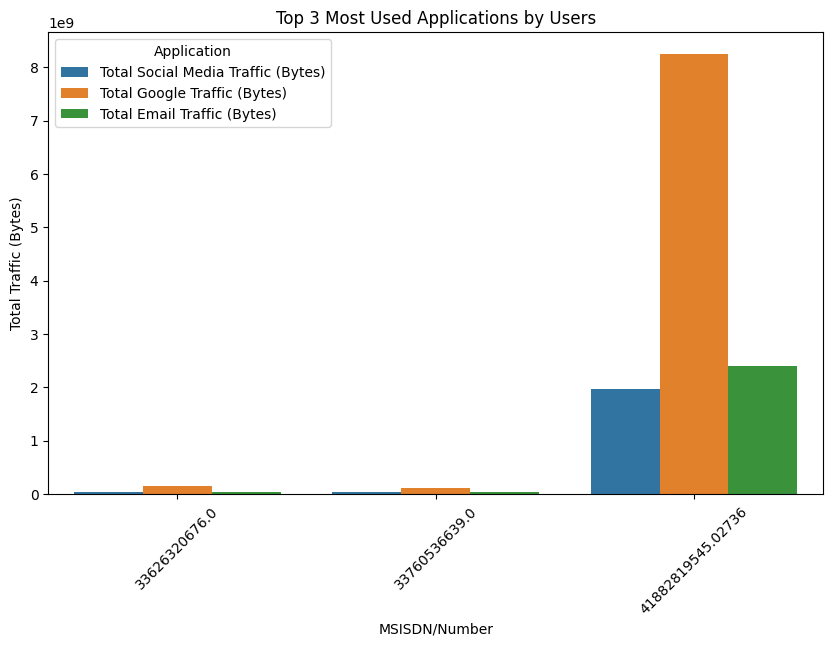

In [ ]:
#plot the top 3 most used applications

import matplotlib.pyplot as plt
import seaborn as sns

top_3_apps = user_total_traffic[['Total Social Media Traffic (Bytes)', 'Total Google Traffic (Bytes)', 'Total Email Traffic (Bytes)']].nlargest(3, 
                                                                                                                                                )
top_3_apps = top_3_apps.reset_index()
top_3_apps = pd.melt(top_3_apps, id_vars='MSISDN/Number', var_name='Application', value_name='Total Traffic (Bytes)')
plt.figure(figsize=(10, 6))
sns.barplot(x='MSISDN/Number', y='Total Traffic (Bytes)', hue='Application', data=top_3_apps)
plt.title('Top 3 Most Used Applications by Users')
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Traffic (Bytes)')
plt.xticks(rotation=45)
plt.show()
